## Metodologi Data Mining CRISP-DM

#### Studi Kasus : Data Penumpang Kapal Titanic yang Tenggelam

### 1. Business Understanding 

Kapal Titanic yang berlayar pada tanggal 15 April 1912 yang melanggar gunung es dan menewaskan 1502 penumpang dari total keseluruhan 2.224 penumpang dan awak kapal. Disini saya memilih dataset `train.csv` dari https://www.kaggle.com/c/titanic, dari dataset tersebut saya ingin menganalisa gambaran penumpang yang selamat ketika berada di kapal tersebut. Menganalisa tentang penumpang seperti apa yang secara umum dapat bertahan. Jadi, dengan menerapkan analisa data dapat dihasilkan sebuah model yang mampu memprediksi penumpang seperti apa yang mungkin selamat jika terjadi kecelakaan semacam itu di kemudian hari.

### 2. Data Understanding

In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [643]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [644]:
df.shape

(891, 12)

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Visualisasi Data secara Statistik Deskriptif

In [646]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


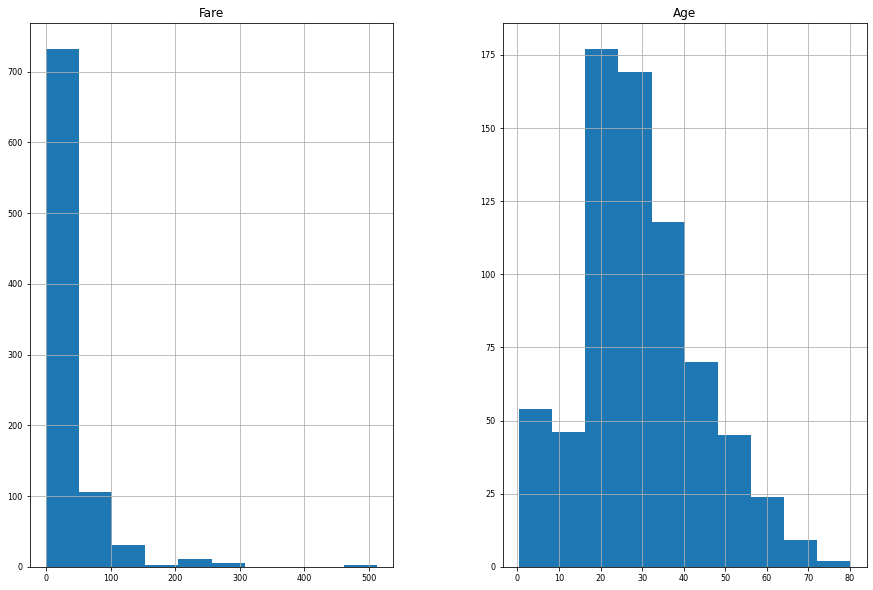

In [647]:
df[['Fare', 'Age']].hist(figsize=(15,10), xlabelsize=8, ylabelsize=8)
plt.show()

In [648]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Visualisasi Data secara Grafik

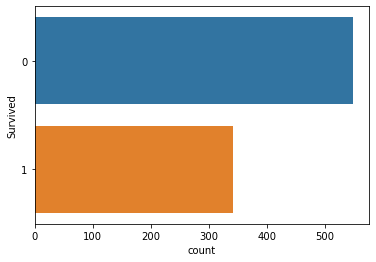

In [649]:
sns.countplot(y = 'Survived', data = df)
plt.show()

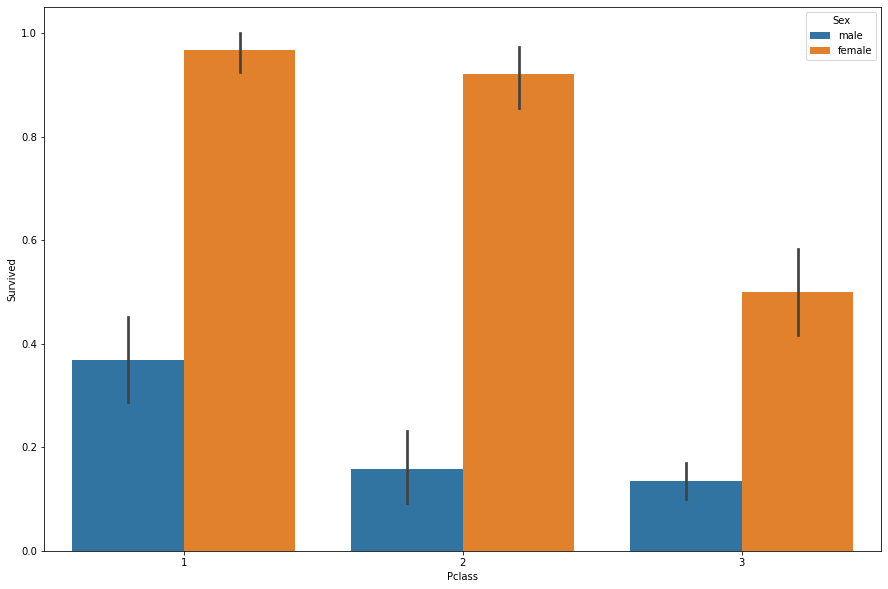

In [650]:
fig, ax = plt.subplots(1,1, figsize =(15,10))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df, ax=ax)
plt.show()

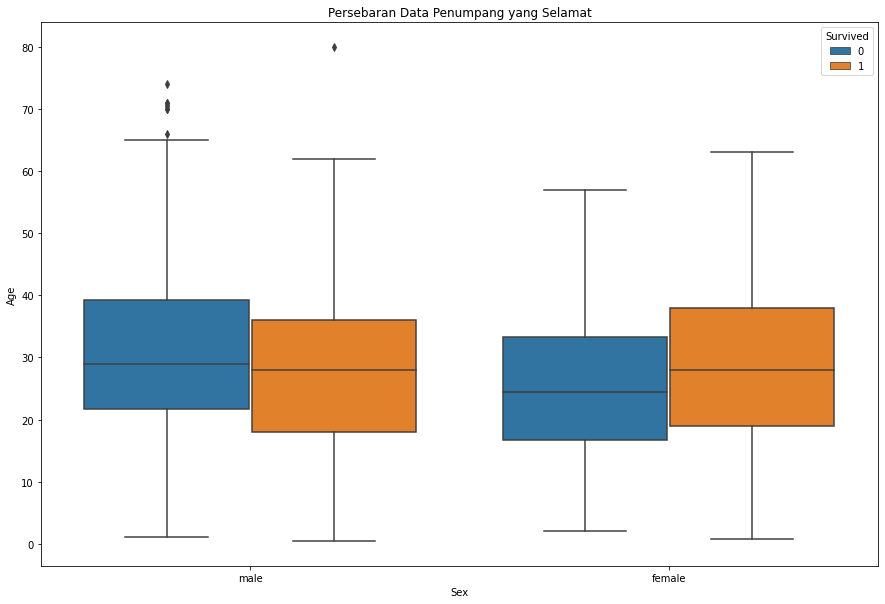

In [651]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
plt.title("Persebaran Data Penumpang yang Selamat")
sns.boxplot(x='Sex', y='Age', data=df, hue='Survived');

#### Visualisasi Correlation Menggunakan Heatmap

In [652]:
df['Sex']=df['Sex'].replace('male', 0)
df['Sex']=df['Sex'].replace('female', 1)

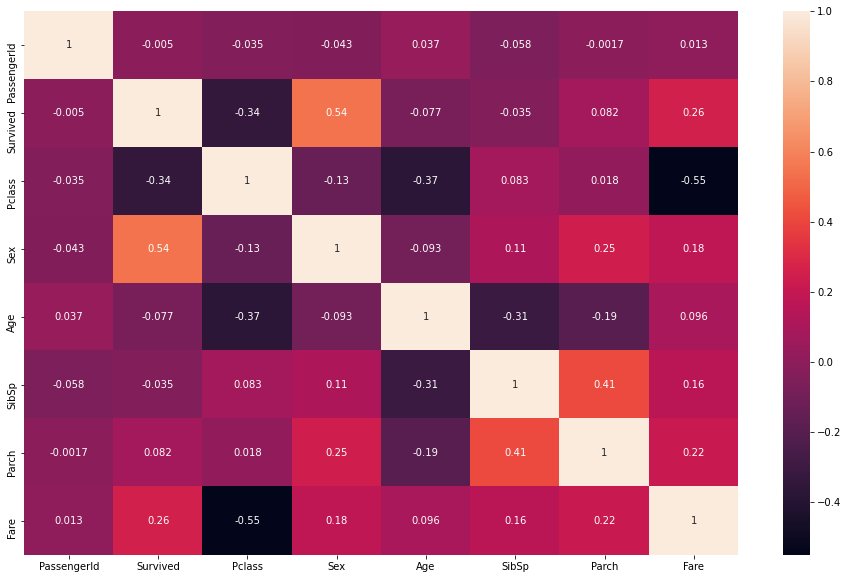

In [653]:
plt.figure(figsize=(16, 10))

sns.heatmap(df.corr(), annot=True)
plt.show()

### 3. Data Preparation / Data Cleaning

In [654]:
df.isnull().sum(axis =0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Kemudian dilakukan perbaikan dengan melalukan imputasi (mengisi nilai yang kosong tersebut dengan nilai mean (rata-rata)

### 4. Tahap Transformasi Dataset

In [655]:
df = df.fillna(df.mean())
print(df.mean())
df.isnull().sum()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Sex              0.352413
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5. Tahap Modelling

In [656]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


#### Train Test Split

In [657]:
# One Hot Encoding semua features
df = pd.get_dummies(df)

In [658]:
# menentukan X dan y
X1 = df[['Sex', 'Age', 'Pclass']]
y1 = df['Survived']

In [659]:
# split data menjadi training dan testing set dengan perbadingan 80:20
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

### Logistic Regression

In [660]:
# tentukan variabel X dan variabel y
X2 = df['Age'].values.reshape(-1,1)
y2 = df['Survived'].values

In [661]:
logres = LogisticRegression()
logres = logres.fit(X2, y2)

In [662]:
umur=22
print('Prediksi orang yang berumur',umur,' tahun: {}'.format(str(logres.predict(np.array([[umur]])))))
if logres.predict(np.array([[umur]]))==0:
    print('Tidak Selamat')
else:
    print('Selamat')
    
print('\n','Keterangan: 0 berarti tidak selamat, 1 berarti selamat')

Prediksi orang yang berumur 22  tahun: [0]
Tidak Selamat

 Keterangan: 0 berarti tidak selamat, 1 berarti selamat


In [663]:
print('Probabilitas orang yang berumur',umur,' tahun: ','\n')
print('Probabilitas selamat {:.2f}'.format(float(logres.predict_proba(np.array([[umur]]))[0,0])))
print('Probabilitas tak selamat {:.2f}'.format(float(logres.predict_proba(np.array([[umur]]))[0,1])))

Probabilitas orang yang berumur 22  tahun:  

Probabilitas selamat 0.60
Probabilitas tak selamat 0.40


### Naive Bayes

In [664]:
print("Banyak data train setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data test setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data train setelah dilakukan Train-Validation Split:  712
Banyak data test setelah dilakukan Train-Validation Split:  179


In [665]:
nb = naive_bayes.BernoulliNB()

nb.fit(X1_train, y1_train)
y_pred = nb.predict(X1_test)
score = metrics.accuracy_score(y1_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.7877094972067039


### K-Nearest Neighbors

In [666]:
# membuat objek K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')

# train model K-Nearest Neighbors
knn.fit(X1_train, y1_train)

# hasil prediksi model
y_pred= knn.predict(X1_test)

# ambil hasil nya untuk evaluasi model
acc_s = accuracy_score(y1_test, y_pred)
conf_m = confusion_matrix(y1_test, y_pred)
class_r = classification_report(y1_test, y_pred)

print("Accuracy Score:" , acc_s)
print("\nConfusion Matrix: \n" , conf_m)
print("\nClassification Report: \n", class_r)

Accuracy Score: 0.8044692737430168

Confusion Matrix: 
 [[107   3]
 [ 32  37]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       110
           1       0.93      0.54      0.68        69

    accuracy                           0.80       179
   macro avg       0.85      0.75      0.77       179
weighted avg       0.83      0.80      0.79       179



### 6. Tahap Evaluasi

In [667]:
train = df.drop(['PassengerId'], axis = 1)
X = train._get_numeric_data().drop('Survived', axis = 1).values
y = train['Survived'].values

# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

logres = LogisticRegression()
logres.fit(X_train, y_train)

y_train_pred = logres.predict(X_train)
y_test_pred = logres.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[414  25]
 [ 47 226]]


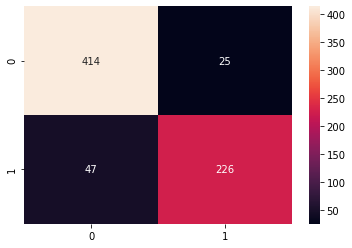

In [668]:
print(cm(y_train, y_train_pred))
sns.heatmap(cm(y_train, y_train_pred), annot = True, fmt='.0f');

In [669]:
ps = precision_score(y_train, y_train_pred)
rs = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision Score : ", ps)
print("Recall Score    : ", rs)
print("F1 Score        : ", f1)

Precision Score :  0.900398406374502
Recall Score    :  0.8278388278388278
F1 Score        :  0.8625954198473283
